In [1]:
import numpy as np
from matplotlib import pyplot as plt

from mne import Epochs, create_info
from mne.io import RawArray
from mne.time_frequency import  tfr_array_morlet
import pandas as pd
import numpy as np
import mne
import scipy.io as sio
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from mne.report import Report
import sys
from mne.preprocessing import ICA, create_eog_epochs, create_ecg_epochs, corrmap, read_ica
from mne.report import Report
import math 
import pickle
import mne
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
from mne.preprocessing import ICA, create_eog_epochs, create_ecg_epochs, corrmap
from mne.preprocessing import annotate_movement, compute_average_dev_head_t
from mne.report import Report
import math 
import pickle
from mne.time_frequency import tfr_array_multitaper, tfr_array_morlet, tfr_multitaper

In [2]:
import mne
from mne.channels import make_1020_channel_selections
from mne.event import define_target_events

print(__doc__)

Automatically created module for IPython interactive environment


In [3]:
path="F:/epochs_ITC"

subjects = ["sub_m_1_02", "sub_m_1_06", "sub_m_1_10","sub_m_1_14","sub_m_1_18","sub_m_1_22","sub_m_1_26","sub_m_1_30","sub_m_1_34","sub_m_1_38","sub_m_1_42","sub_m_1_46",
            "sub_m_2_04","sub_m_2_08","sub_m_2_12","sub_m_2_16","sub_m_2_20","sub_m_2_24","sub_m_2_28","sub_m_2_32","sub_m_2_36","sub_m_2_40","sub_m_2_44",
            "sub_p_1_01","sub_p_1_05","sub_p_1_09","sub_p_1_13","sub_p_1_17","sub_p_1_21","sub_p_1_25","sub_p_1_29","sub_p_1_33","sub_p_1_35","sub_p_1_37","sub_p_1_41","sub_p_1_45",
            "sub_p_2_03","sub_p_2_07","sub_p_2_11","sub_p_2_15","sub_p_2_19","sub_p_2_27","sub_p_2_31","sub_p_2_39","sub_p_2_43","sub_p_2_47",]  # 被试数据

for subj in subjects:
    epochs = mne.read_epochs(
        f"F:/epochs_ITC/{subj}-raw-ica-ERP-epo.fif",
        preload=True
    )

Reading F:\epochs_ITC\sub_m_1_02-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1051 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_06-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1068 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_10-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1002 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_14-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF comp

In [20]:
for i, ch in enumerate(epochs.ch_names):
    print(f'"EEG {i:03d}": "{ch}",')

"EEG 000": "Fp1",
"EEG 001": "AF7",
"EEG 002": "AF3",
"EEG 003": "F1",
"EEG 004": "F3",
"EEG 005": "F5",
"EEG 006": "F7",
"EEG 007": "FT7",
"EEG 008": "FC5",
"EEG 009": "FC3",
"EEG 010": "FC1",
"EEG 011": "C1",
"EEG 012": "C3",
"EEG 013": "C5",
"EEG 014": "T7",
"EEG 015": "TP7",
"EEG 016": "CP5",
"EEG 017": "CP3",
"EEG 018": "CP1",
"EEG 019": "P1",
"EEG 020": "P3",
"EEG 021": "P5",
"EEG 022": "P7",
"EEG 023": "P9",
"EEG 024": "PO7",
"EEG 025": "PO3",
"EEG 026": "O1",
"EEG 027": "Iz",
"EEG 028": "Oz",
"EEG 029": "POz",
"EEG 030": "Pz",
"EEG 031": "CPz",
"EEG 032": "Fpz",
"EEG 033": "Fp2",
"EEG 034": "AF8",
"EEG 035": "AF4",
"EEG 036": "AFz",
"EEG 037": "Fz",
"EEG 038": "F2",
"EEG 039": "F4",
"EEG 040": "F6",
"EEG 041": "F8",
"EEG 042": "FT8",
"EEG 043": "FC6",
"EEG 044": "FC4",
"EEG 045": "FC2",
"EEG 046": "FCz",
"EEG 047": "Cz",
"EEG 048": "C2",
"EEG 049": "C4",
"EEG 050": "C6",
"EEG 051": "T8",
"EEG 052": "TP8",
"EEG 053": "CP6",
"EEG 054": "CP4",
"EEG 055": "CP2",
"EEG 056": "P2",
"E

Reading F:\epochs_ITC\sub_m_1_02-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1051 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_06-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1068 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_10-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1002 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_14-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF comp

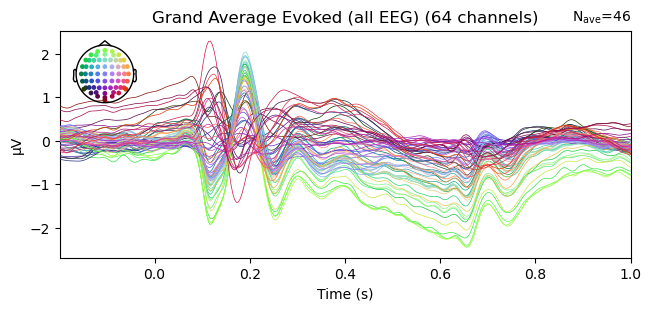

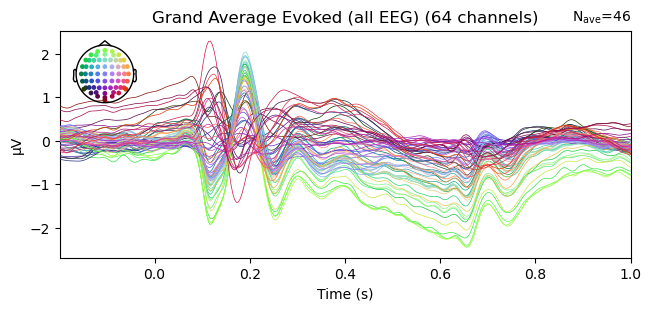

In [5]:
evokeds = []

for subj in subjects:
    epochs = mne.read_epochs(
        f"F:/epochs_ITC/{subj}-raw-ica-ERP-epo.fif",
        preload=False
    )
    evokeds.append(epochs.average())

grand_evoked = mne.grand_average(evokeds)

grand_evoked.plot(
    titles="Grand Average Evoked (all EEG)",
    time_unit="s"
)

Loading data for 1020 events and 308 original time points ...
Applying baseline correction (mode: logratio)


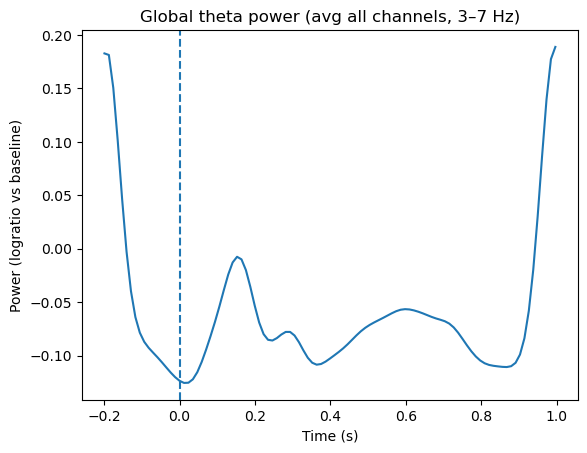

In [8]:
freqs = np.arange(2, 30, 1)
n_cycles = freqs / 3

power = epochs.compute_tfr(
    method="morlet",
    freqs=freqs,
    n_cycles=n_cycles,
    tmin=epochs.tmin,
    tmax=1.0,
    average=True,
    return_itc=False,
    decim=3,
)

power=power.apply_baseline(baseline=(-0.2,0),mode="logratio")

theta = power.copy().crop(fmin=3, fmax=7)

theta_global = theta.data.mean(axis=(0, 1))

plt.figure()
plt.plot(theta.times, theta_global)
plt.axvline(0, linestyle="--")
plt.title("Global theta power (avg all channels, 3–7 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Power (logratio vs baseline)")
plt.show()

In [76]:
import numpy as np
import mne

freqs = np.arange(2, 30, 1)
n_cycles = freqs / 3

sat_keys = [
    "cue/ext/rep/sat",
    "cue/ext/swi/sat",
    "cue/int/rep/sat",
    "cue/int/swi/sat",
]

tfr_power = {}

for key in sat_keys:
    epochs_cell = epochs[key].copy().pick_types(eeg=True)

    power = epochs_cell.compute_tfr(
        method="morlet",
        freqs=freqs,
        n_cycles=n_cycles,
        tmin=-0.2,
        tmax=1.0,
        average=True,
        return_itc=False,
        decim=3,
    )

    power.apply_baseline(baseline=(-0.2, 0), mode="logratio")
    tfr_power[key] = power

    print(key, power.data.shape)  # (n_channels, n_freqs, n_times)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
cue/ext/rep/sat (62, 28, 103)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
cue/ext/swi/sat (62, 28, 103)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
cue/int/rep/sat (62, 28, 103)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
cue/int/swi/sat (62, 28, 103)


In [75]:
#接上，64-channel heat map
import numpy as np
import matplotlib.pyplot as plt

freqs = np.arange(2, 30, 1)
n_cycles = freqs / 3

conds = [
    "cue/ext/rep/sat",
    "cue/ext/swi/sat",
    "cue/int/rep/sat",
    "cue/int/swi/sat",
]

theta_ct = {} 

for key in conds:
    epochs_cell = epochs[key].copy()
    epochs_cell.load_data()            
    epochs_cell = epochs_cell.pick_types(eeg=True)

    power = epochs_cell.compute_tfr(
        method="morlet",
        freqs=freqs,
        n_cycles=n_cycles,
        tmin=-0.2,
        tmax=1.0,
        average=True,
        return_itc=False,
        decim=3,
    )
    power.apply_baseline(baseline=(-0.2, 0), mode="logratio")

    # theta band -> mean over freqs => (n_channels, n_times)
    p_theta = power.copy().crop(fmin=3, fmax=7)
    theta_ct[key] = p_theta.data.mean(axis=1)
    times = p_theta.times
    ch_names = p_theta.ch_names


all_vals = np.concatenate([theta_ct[k].ravel() for k in conds])
vmax = np.percentile(np.abs(all_vals), 98)  
vmin = -vmax


fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True, constrained_layout=True)

for ax, key in zip(axes.ravel(), conds):
    im = ax.imshow(
        theta_ct[key],
        aspect="auto",
        origin="lower",
        extent=[times[0], times[-1], 0, len(ch_names)],
        vmin=vmin, vmax=vmax,
    )
    ax.axvline(0, linestyle="--")
    ax.set_title(key.replace("cue/", ""))  
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Channel")


yticks = np.arange(0, len(ch_names), 2)
axes[0, 0].set_yticks(yticks)
axes[0, 0].set_yticklabels([ch_names[i] for i in yticks], fontsize=7)

fig.colorbar(im, ax=axes.ravel().tolist(), label="Theta power (logratio)")
plt.show()

diff_ext = (theta_ct["cue/ext/rep/sat"]- theta_ct["cue/ext/swi/sat"])
diff_int = (theta_ct["cue/int/rep/sat"]- theta_ct["cue/int/swi/sat"])

fig, axes = plt.subplots(
    1, 2, figsize=(14, 6),
    sharex=True, sharey=True,
    constrained_layout=True
)

for ax, diff, title in zip(
    axes,
    [diff_ext, diff_int],
    ["ext: rep − swi", "int: rep − swi"]
):
    im = ax.imshow(
        diff,
        aspect="auto",
        origin="lower",
        extent=[times[0], times[-1], 0, len(ch_names)],
        vmin=vmin, vmax=vmax,
        cmap="RdBu_r",
    )
    ax.axvline(0, linestyle="--", color="k")
    ax.set_title(title)
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Channel")

axes[0].set_yticks(yticks)
axes[0].set_yticklabels([ch_names[i] for i in yticks], fontsize=7)

fig.colorbar(im, ax=axes.ravel().tolist(), label="Theta power difference (logratio)")
plt.show()

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)


In [77]:
#Frequency analysis
import matplotlib.pyplot as plt
import numpy as np

import mne
from mne.datasets import somato

import os
import numpy as np
import mne

In [78]:
subjects = ["sub_m_1_02", "sub_m_1_06", "sub_m_1_10","sub_m_1_14","sub_m_1_18","sub_m_1_22","sub_m_1_26","sub_m_1_30","sub_m_1_34","sub_m_1_38","sub_m_1_42","sub_m_1_46",
            "sub_m_2_04","sub_m_2_08","sub_m_2_12","sub_m_2_16","sub_m_2_20","sub_m_2_24","sub_m_2_28","sub_m_2_32","sub_m_2_36","sub_m_2_40","sub_m_2_44",
            "sub_p_1_01","sub_p_1_05","sub_p_1_09","sub_p_1_13","sub_p_1_17","sub_p_1_21","sub_p_1_25","sub_p_1_29","sub_p_1_33","sub_p_1_35","sub_p_1_37","sub_p_1_41","sub_p_1_45",
            "sub_p_2_03","sub_p_2_07","sub_p_2_11","sub_p_2_15","sub_p_2_19","sub_p_2_27","sub_p_2_31","sub_p_2_39","sub_p_2_43","sub_p_2_47",]  # 被试数据

EPOCHS_DIR = r"F:/epochs_ITC"

target_sfreq = 100  #200对应最高分析100Hz，100对应一秒100个时间点，最高分析到50Hz
tmin, tmax = -0.2,1.0         
baseline = (-0.2, 0.0)           

pick_kwargs = dict(eeg=True, eog=True, meg=False, stim=False)

epochs_all = {}

for subj in subjects:
    epo_path = os.path.join(EPOCHS_DIR, f"{subj}-raw-ica-ERP-epo.fif")
    epochs = mne.read_epochs(epo_path, preload=True)

  
    if target_sfreq is not None and epochs.info["sfreq"] != target_sfreq:
        epochs = epochs.copy().resample(target_sfreq)

    epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
    
    epochs = epochs.copy().apply_baseline(baseline)

    epochs = epochs.copy().pick_types(**pick_kwargs)

    epochs_all[subj] = epochs

print(f"Loaded {len(epochs_all)} subjects' epochs.")


Reading F:\epochs_ITC\sub_m_1_02-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1051 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_m_1_06-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1068 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_m_1_10-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1002 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_1_14-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1034 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_m_1_18-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1009 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_m_1_22-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
985 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_m_1_26-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
984 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_m_1_30-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1011 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_m_1_34-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1026 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_m_1_38-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1040 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_1_42-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1012 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_m_1_46-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1003 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_2_04-raw-ica-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1028 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_2_08-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1009 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_m_2_12-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1035 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_m_2_16-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1043 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_2_20-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1029 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_m_2_24-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1008 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_2_28-raw-ica-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1026 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_m_2_32-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1036 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_m_2_36-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1015 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_m_2_40-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1015 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_2_44-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1022 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_p_1_01-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1036 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_p_1_05-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1014 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_1_09-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1000 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_1_13-raw-ica-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
991 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_1_17-raw-ica-ERP-epo.fif ...
    Found the data of interest:


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1007 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_1_21-raw-ica-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1066 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_p_1_25-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1006 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_1_29-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1006 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_1_33-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1010 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_1_35-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
993 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_p_1_37-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1004 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_p_1_41-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1032 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_p_1_45-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
999 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_2_03-raw-ica-ERP-epo.fif ...
    Found the data of interest:


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1022 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_2_07-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
994 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_p_2_11-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1023 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_2_15-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1003 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_p_2_19-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1002 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_2_27-raw-ica-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
986 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_2_31-raw-ica-ERP-epo.fif ...
    Found the data of interest:


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1012 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_p_2_39-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1009 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_p_2_43-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1026 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_2_47-raw-ica-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1020 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_21076\3725531332.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Loaded 46 subjects' epochs.


    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


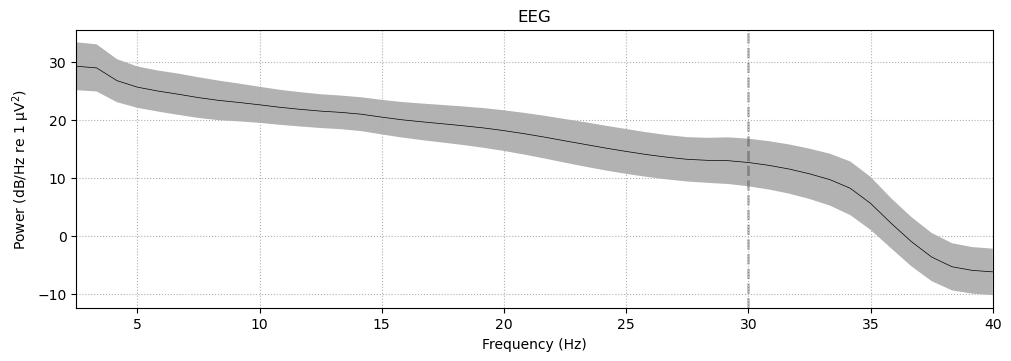

In [79]:
psd = epochs.compute_psd(fmin=2.0, fmax=40.0)
psd.plot(average=True, amplitude=False)

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs before plotting...


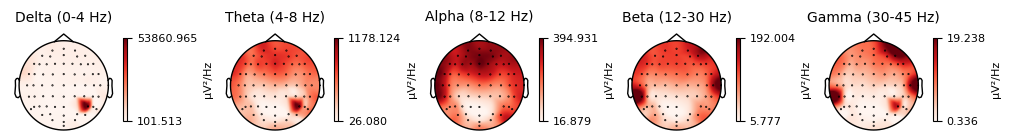

In [80]:
epochs.compute_psd().plot_topomap(ch_type="eeg", normalize=False, contours=0)

In [81]:
#PSD Power spectual density
_, ax = plt.subplots()

spectrum = epochs.compute_psd(
    fmin=2.0,
    fmax=40.0,
    tmax=3.0,
    n_jobs=None,
    picks="eeg",          
)

mean_spectrum = spectrum.average()  # average across epochs
psds, freqs = mean_spectrum.get_data(return_freqs=True)  # psds: (n_channels, n_freqs)

psds_db = 10 * np.log10(psds)
psds_mean = psds_db.mean(axis=0)    # mean across channels
psds_std  = psds_db.std(axis=0)     # std across channels

ax.plot(freqs, psds_mean, color="k")
ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
                color="k", alpha=0.5, edgecolor="none")

ax.set(
    title="Multitaper PSD (EEG, mean ± SD across channels)",
    xlabel="Frequency (Hz)",
    ylabel="Power Spectral Density (dB)",
)
plt.show()

    Using multitaper spectrum estimation with 7 DPSS windows


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Effective window size : 1.200 (s)
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).


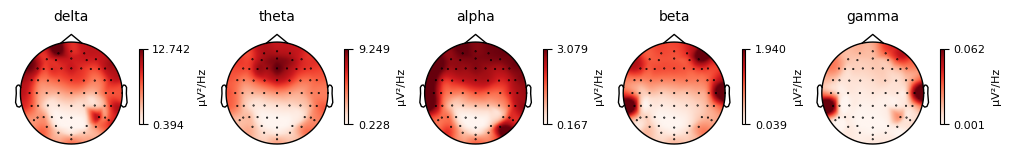

In [82]:
#visualizing Specturum Objects
%matplotlib qt

epochs_eeg = epochs.copy().pick_types(eeg=True, eog=False, meg=False)
epochs_spectrum = epochs_eeg.compute_psd(
    method="welch",       
    fmin=2, fmax=40,
    picks="eeg",
    n_jobs=None
)
evk_spectrum = epochs_spectrum.average()
evk_spectrum.plot(picks="data", exclude="bads")
evk_spectrum.plot(dB=True) 
evk_spectrum.plot_topo(color="k", fig_facecolor="w", axis_facecolor="w",show=True)

fig.savefig("evk_spectrum_psd_topo.png",dpi=300,bbox_inches="tight")

evk_spectrum.plot_topomap(ch_type="eeg", agg_fun=np.median,show=True)

fig.savefig("evk_spectrum_topomap_global.png",dpi=300,bbox_inches="tight")

bands = {
    "delta": (0.5, 4),
    "theta": (4, 8),
    "alpha": (8, 12),
    "beta": (12, 30),
    "gamma": (30, 40),
}

evk_spectrum.plot_topomap(
    bands=bands,
    ch_type="eeg",
    agg_fun=np.median,   
    normalize=False,
    contours=0,
    show=True
)

    

In [21]:
#Time-frequency analysis: power and inter-trial coherence
import numpy as np
import mne

freqs = np.array([4, 6, 8, 10, 13, 18, 25, 30])
n_cycles = freqs / 2.0  # ~500 ms window

power, itc = epochs_eeg.compute_tfr(
    method="morlet",
    freqs=freqs,
    n_cycles=n_cycles,
    picks="eeg",
    average=True,
    return_itc=True,
    decim=3,
)

print("power type:", type(power))
power

power type: <class 'mne.time_frequency.tfr.AverageTFR'>


Data type,Average Power Estimates
Data source,Epochs
Number of epochs,62
Dims,"channel, freq, time"
Estimation method,morlet
Number of channels,62
Number of timepoints,103
Number of frequency bins,8
Frequency range,4.00 – 30.00 Hz


In [22]:
#Power Change Across Time
freqs = np.concatenate([np.arange(4,8,1),np.arange(8,14,2),np.arange(14,30,4)])
n_cycles = freqs / 2.0   # ~500 ms window

power, itc = epochs.compute_tfr(
    method="morlet",
    freqs=freqs,
    n_cycles=n_cycles,
    picks="eeg",
    average=True,
    return_itc=True,
    decim=3,
)

Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)


C:\Users\benjy\.conda\envs\mne\Lib\site-packages\mne\baseline.py:115: RuntimeWarning: invalid value encountered in log10
  np.log10(d, out=d)
C:\Users\benjy\.conda\envs\mne\Lib\site-packages\mne\baseline.py:115: RuntimeWarning: invalid value encountered in log10
  np.log10(d, out=d)


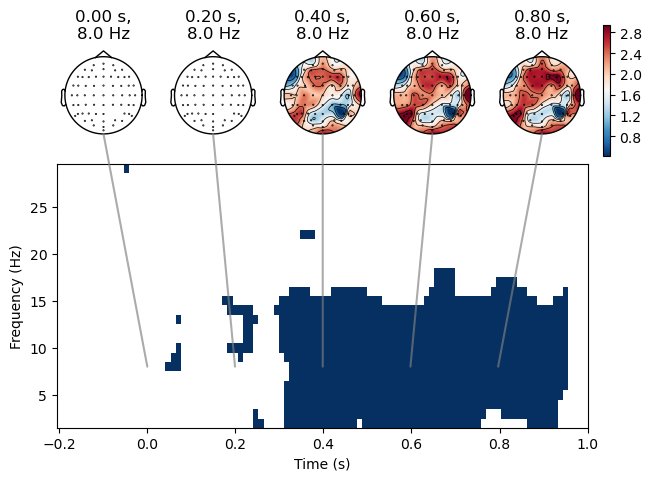

In [71]:
power.plot_joint(
    baseline=(-0.2, 0), mode="logratio", tmin=-0.2, tmax=1, timefreqs=[(0, 4),(0.2, 4), (0.4, 4),(0.6, 4),(0.8, 4)]
)
power.plot_joint(
    baseline=(-0.2, 0), mode="logratio", tmin=-0.2, tmax=1, timefreqs=[(0, 8),(0.2, 8), (0.4, 8),(0.6, 8),(0.8,8)]
)

No baseline correction applied


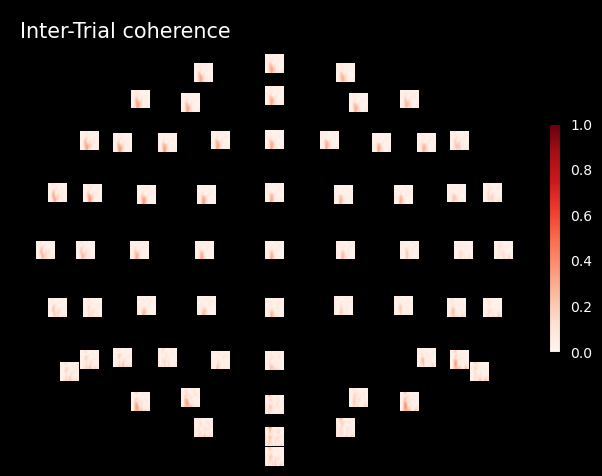

In [73]:
#ITC
itc.plot_topo(title="Inter-Trial coherence", vmin=0.0, vmax=1.0, cmap="Reds")

In [64]:
#Checking Baseline
import numpy as np

tmin_b, tmax_b = -0.2, 0
bmask = (power.times >= tmin_b) & (power.times <= tmax_b)

# baseline average power(channel x frequency)
base = power.data[:, :, bmask].mean(axis=2)
print("baseline min/max:", np.nanmin(base), np.nanmax(base))

# power across time
full = power.data
print("full min/max:", np.nanmin(full), np.nanmax(full))

baseline min/max: -0.3210880172144349 -0.00019816705122531697
full min/max: -0.9345612953344756 0.5788137906619001


In [70]:
#Power visulazing~No power
baseline_1=(-0.4,-0.1)

occipital_chs = ["O1", "Oz", "O2", "PO3", "POz", "PO4"]

power.plot_topo(baseline=baseline_1, mode="logratio", title="Average power")
power.plot(picks=occipital_chs, baseline=baseline_1, mode="logratio",
           title="Occipital channels: " + ", ".join(occipital_chs))

fig, axes = plt.subplots(1, 2, figsize=(7, 4), layout="constrained")
topomap_kw = dict(
    ch_type="eeg", tmin=0.4, tmax=1,baseline=baseline_1, mode="logratio", show=False
)
plot_dict = dict(Alpha=dict(fmin=8, fmax=12))
for ax, (title, fmin_fmax) in zip(axes, plot_dict.items()):
    power.plot_topomap(**fmin_fmax, axes=ax, **topomap_kw)
    ax.set_title(title)

Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)


C:\Users\benjy\.conda\envs\mne\Lib\site-packages\mne\baseline.py:115: RuntimeWarning: invalid value encountered in log10
  np.log10(d, out=d)


Applying baseline correction (mode: logratio)


In [31]:
frontal_chs=["Fz", "F1", "F2", "FCz", "FC1", "FC2", "Cz"]
occipital_chs = ["Oz", "O1", "O2","POz", "PO3", "PO4"]

bands={"theta":(4,8),"alpha":(8,12)}

import numpy as np
import mne

def extract_roi_band_timecourse(power, roi_channels, fmin, fmax):
    """
    power: mne.time_frequency.AverageTFR
    roi_channels: list of channel names
    fmin, fmax : frequency band (Hz)
    """
  
    missing = [ch for ch in roi_channels if ch not in power.ch_names]
    if len(missing) > 0:
        raise ValueError(f"Missing channels in {roi_name}: {missing}")

    roi_idx = [power.ch_names.index(ch) for ch in roi_channels]
    freq_mask = (power.freqs >= fmin) & (power.freqs <= fmax)
    roi_data = power.data[roi_idx][:, freq_mask, :] #channel x freqs x times
    roi_tc = roi_data.mean(axis=(0, 1))

    return roi_tc
    
frontal_theta = extract_roi_band_timecourse(power,frontal_chs,*bands["theta"])
frontal_alpha = extract_roi_band_timecourse(power,frontal_chs,*bands["alpha"])
occipital_theta=extract_roi_band_timecourse(power,occipital_chs,*bands["theta"])
occipital_alpha=extract_roi_band_timecourse(power,occipital_chs,*bands["alpha"])

times = power.times

import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
plt.plot(times, frontal_theta, label="Frontal Theta")
plt.plot(times, frontal_alpha, label="Frontal Alpha")
plt.plot(times, occipital_theta, label="Occipital Theta")
plt.plot(times, occipital_alpha, label="Occipital Alpha")
plt.axvline(0, color="k", linestyle="--")
plt.xlabel("Time (s)")
plt.ylabel("Power")
plt.legend()
plt.title("ROI × Band Time Courses")
plt.tight_layout()
plt.show()


In [6]:
#theta_power
freqs = np.arange(2, 30, 1)
n_cycles = freqs / 3

power = epochs.compute_tfr(
    method="morlet",
    freqs=freqs,
    n_cycles=n_cycles,
    tmin=epochs.tmin,
    tmax=1.0,
    average=True,
    return_itc=False,
    decim=3,
)

power = power.apply_baseline(baseline=(-0.2, 0), mode="logratio")

theta_power = power.copy().crop(fmin=3, fmax=7)


Loading data for 1020 events and 308 original time points ...
Applying baseline correction (mode: logratio)
